<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Teoría de Circuitos II

# TRABAJO SEMANAL
#### Autor: RICARDO RELOZ


# EJERCICIO

## Dado el siguiente circuito:

### 👉  Hallar la transferencia T=VoVi en función de ωo y Q
### 👉  Hallar los parámetros ωo, Q y k
### 👉  Obtener el valor de los componentes para que el circuito se comporte como un Butterworth de 2do orden.
### 👉  Cómo podría obtener un filtro pasabajo Butterworth de 4to orden, a partir de un prototipo basado en este circuito, y que cumpla con |T(0)|=20dB

### Bonus:
    +10 💎 Obtener los valores de la red normalizados en frecuencia e impedancia.
    +10  ⚽️ Simulación circuital de todos los experimentos.
    +10  🎸 Cómo podría obtener un circuito pasabanda con los mismos componentes originales y con qué parámetros quedaría diseñado (Ver ejemplo 4.6 en Schaumann).

<img src="./CIRCUITO.png" align="left" width="900" /> 

## Ejercicio 1 y Ejercicio 2
Para analizar el circuito, primero estableci las GND y las tensiones auxiliares
### Analisis de Circuito
<img src="./ANALISIS_CIRCUITO.jpg" align="left" width="900" /> 

### Calculos
<img src="./HOJA1.jpg" align="left" width="420" /> 
<img src="./HOJA2.jpg" align="left" width="500" /> 

## Ejercicio 3
Para obtener los valores de los componentes debia averiguar los valores de $Q$ y establecer valores para $\omega_0$, y $K$
En este caso el valor de $Q$ y los polos lo saque del _Schaumann (PAG 275)_ 

$Q=\frac{1}{\sqrt2}$

$K\ =\ 1$

$\omega_0=1000\frac{rad}{seg}$

<img src="./HOJA3.jpg" align="left" width="420" /> 


## SIMULACION LTSPICE

### Circuito Expresado con un buffer 

<img src="./FOTO1.png" align="left" width="900" /> 


### GRAFICO ENTRE ENTRADA Y SALIDA

<img src="./GRAFICO1.png" align="left" width="900" /> 





### Simulacion en PYTHON normalizada


$\omega_0=1\frac{rad}{seg}$

$Q=\frac{1}{\sqrt2}$

$K\ =\ 1$

$ T(s) = \frac{1}{{s^2 + \frac{s}{Q} + 1}} $

(3,
 <Axes: title={'center': 'Retardo de grupo'}, xlabel='Frecuencia angular [rad/seg]', ylabel='Retardo de grupo [seg]'>)

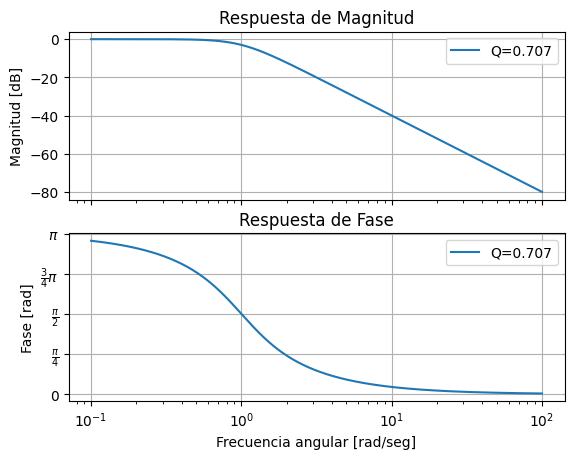

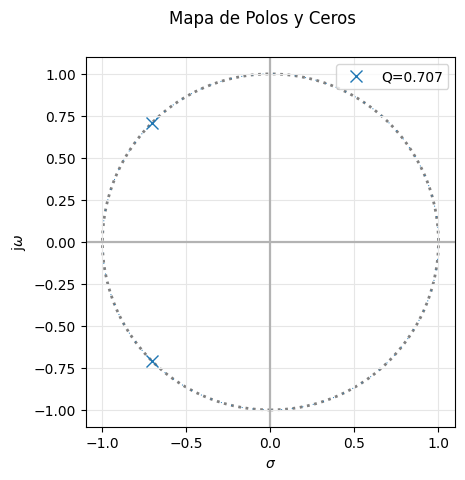

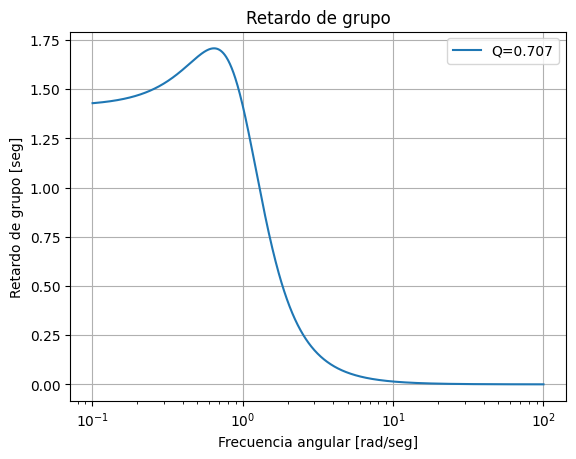

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
# Librerías externas NumPy, SciPy y Matplotlib
from scipy.signal import TransferFunction
import matplotlib.pyplot as plt
import numpy as np


# Librería de TC2, esta la vas a usar mucho
from pytc2.sistemas_lineales import pzmap, GroupDelay, bodePlot

w0 = 1
qq = np.sqrt(0.5)
K = 1


my_tf = TransferFunction( [-K*w0*w0], [1, w0/qq , w0*w0] )


plt.close('all')

bodePlot(my_tf, fig_id=1, filter_description = 'Q={:3.3f}'.format(qq) )

pzmap(my_tf, fig_id=2, filter_description = 'Q={:3.3f}'.format(qq)) #S plane pole/zero plot

GroupDelay(my_tf, fig_id=3, filter_description = 'Q={:3.3f}'.format(qq))

## Ejercicio 4
Para poder hacer un BUTTERWORTH de 4to orden usando este circuito como prototipo, tengo que repetir el circuito mismo, pero modificando en ambos su respectiva $Q$ y $polos$ por separado y luego acoplarlos en cascada mediante un buffer para que no haya interferencia por las impedancias de entrada y salida

<img src="./Diagrama.jpg" align="left" width="1000" /> 

Para cumplir el parametro de _|T(0)|=20dB_, tenia que igualar las s=0 y por consecuencias las $\omega_0$ se anularian dejando las dos $K$ multiplicadas

<img src="./HOJA4.jpg" align="left" width="600" /> 


## SIMULACION LTSPICE

### Circuito Expresado con un buffer 

<img src="./FOTO2.png" align="left" width="900" /> 


### GRAFICO ENTRE ENTRADA Y SALIDA, SE PUEDE VISUALIZAR LA DIFERENCIA DE 20dB

<img src="./GRAFICO2B.png" align="left" width="900" /> 


### MISMO GRAFICO CON VALOR VX DE POR MEDIO PARA VER EL PROGRESO DE LA SEÑAL

<img src="./GRAFICO2A.png" align="left" width="900" /> 


### Se puede ver a comparacion del grafico del ejercicio anterior que tiene una mayor pendiente de descenso


## SIMULACION SPYDER
Expansion de del polinomio del denominador

$=\left(S^2+\frac{S}{Q1}+1\right)\left(S^2+\frac{S}{Q2}+1\right)$

$ S^4 + \left(\frac{1}{Q_1} + \frac{1}{Q_2}\right)S^3 + \left(2 + \frac{1}{Q_1 \cdot Q_2}\right)S^2 + \left(\frac{1}{Q_1} + \frac{1}{Q_2}\right)S + 1 $


(3,
 <Axes: title={'center': 'Retardo de grupo'}, xlabel='Frecuencia angular [rad/seg]', ylabel='Retardo de grupo [seg]'>)

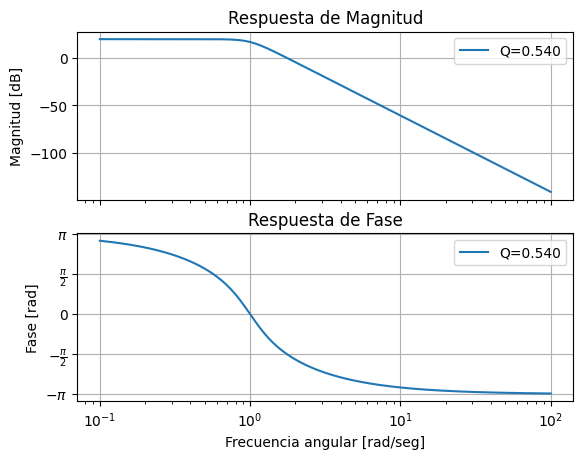

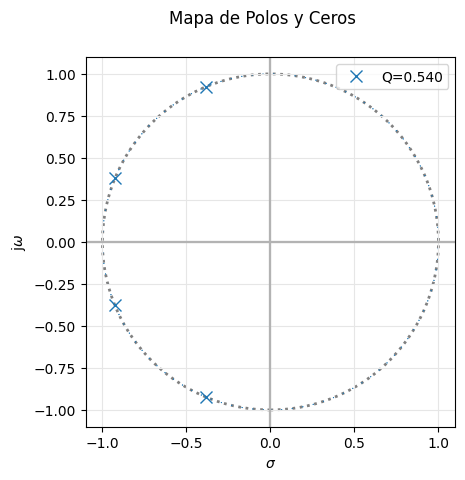

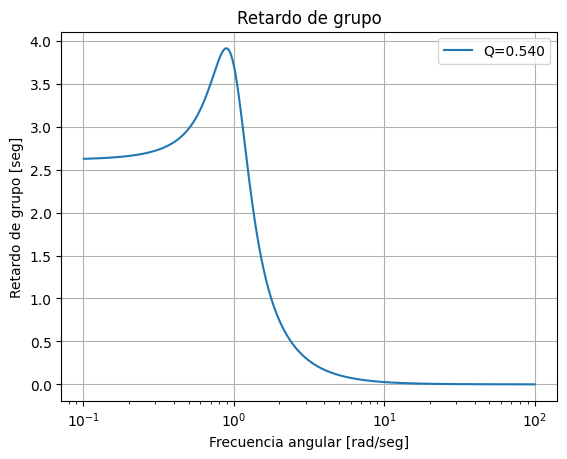

In [4]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

# Librerías externas NumPy, SciPy y Matplotlib
from scipy.signal import TransferFunction
import matplotlib.pyplot as plt
import numpy as np


# Librería de TC2, esta la vas a usar mucho
from pytc2.sistemas_lineales import pzmap, GroupDelay, bodePlot

w0 = 1
qq1 = 0.54

qq2 = 1.31

K = 1000/330


my_tf = TransferFunction( [-K*K*w0*w0], [1 , 1/qq1 + 1/qq2 , 2 + 1/(qq1*qq2) , 1/qq1 + 1/qq2 , 1] )


plt.close('all')

bodePlot(my_tf, fig_id=1, filter_description = 'Q={:3.3f}'.format(qq1) )

pzmap(my_tf, fig_id=2, filter_description = 'Q={:3.3f}'.format(qq1)) #S plane pole/zero plot

GroupDelay(my_tf, fig_id=3, filter_description = 'Q={:3.3f}'.format(qq1))